## Reddit Activity Analysis

In [137]:
%matplotlib inline
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import time
from datetime import datetime
sns.set(style="darkgrid")

In [138]:
KEYWORDS = ["arch", "ubuntu", "'elementary OS'"]

In [139]:
def get_mentions(term, subreddit, days_ago):
    results = dict()

    url = "https://api.pushshift.io/reddit/search/comment/"
    querystring = {"q":f"{term}","after":f"{days_ago}d","aggs":"created_utc","frequency":"day","size":"0","subreddit":f"{subreddit}"}
    payload = ""
    response = requests.request("GET", url, data=payload, params=querystring)
    
    raw_data = response.json()
    data = raw_data["aggs"]["created_utc"]
    
    count = [element["doc_count"] for element in data]
    raw_date = [element["key"] for element in data]
    dates = [datetime.fromtimestamp(element) for element in raw_date]
    
    results["values"] = count
    results["dates"] = dates
    
    return results

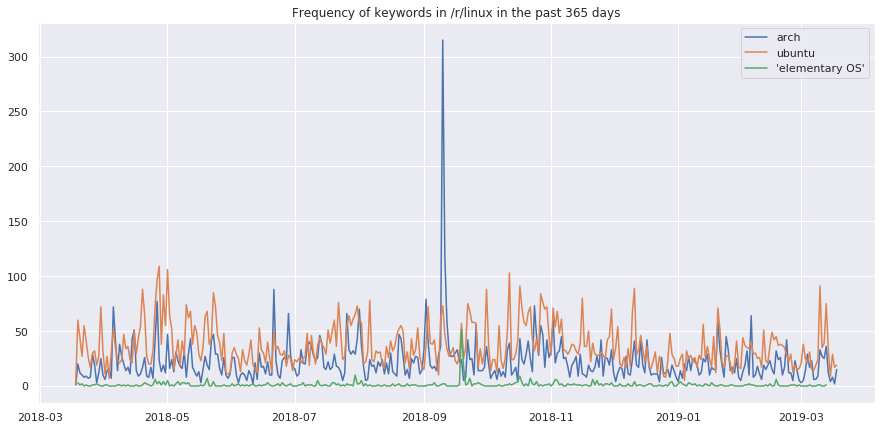

In [145]:
subreddit = "linux"
days_ago = 365
plt.figure(figsize=(15,7))

for keyword in KEYWORDS:
    data = get_mentions(term=keyword, subreddit=subreddit, days_ago=days_ago)
    plt.plot_date(date2num(data["dates"]), data["values"], linestyle="-", marker="", label=keyword)

plt.title(f"Frequency of keywords in /r/{subreddit} in the past {days_ago} days")
plt.legend()
